In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [5]:
df=pd.read_csv(r'Documents\abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df['Age'] = df['Rings'] + 1.5

In [10]:
df.head(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


<AxesSubplot:ylabel='Frequency'>

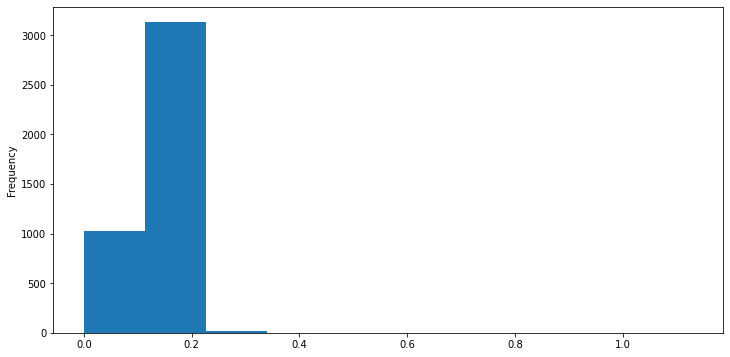

In [6]:
plt.figure()
df.Height.plot(kind='hist' ,figsize=(12,6))

Text(0, 0.5, 'Sex')

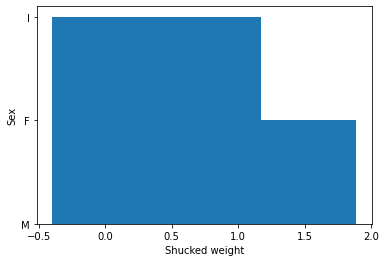

In [7]:
x=list(df['Shucked weight'])
y=list(df['Sex'])
plt.bar(x,y)
plt.xlabel('Shucked weight')
plt.ylabel('Sex')

In [8]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

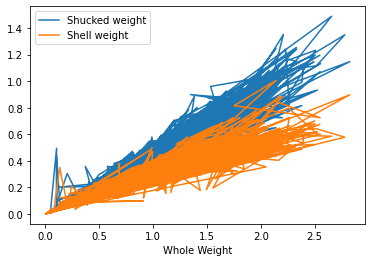

In [9]:
x=list(df['Whole weight'])
y=list(df['Shucked weight'])
z=list(df['Shell weight'])
plt.xlabel('Whole Weight')
plt.plot(x,y,label='Shucked weight')
plt.plot(x,z,label='Shell weight')
plt.legend()

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# There is no missing values.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

7. Check for Categorical columns and perform encoding

In [6]:
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


8. Split the data into dependent and independent variables

In [7]:
# independent variable
X = df.iloc[:,0:9]
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
#dependent variable
y = df.iloc[:,9:]
y.head()

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


9. Scale the independent variables

In [12]:
minmax = MinMaxScaler()
X_scale = minmax.fit_transform(X)
X_scale

array([[1.        , 0.51351351, 0.5210084 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [1.        , 0.37162162, 0.35294118, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.        , 0.61486486, 0.61344538, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [1.        , 0.70945946, 0.70588235, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.        , 0.74324324, 0.72268908, ..., 0.34298881, 0.29347285,
        0.32142857],
       [1.        , 0.85810811, 0.84033613, ..., 0.49506254, 0.49177877,
        0.39285714]])

10. Split the data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 1)
X_train

array([[0.        , 0.64864865, 0.61344538, ..., 0.31928901, 0.2077728 ,
        0.42857143],
       [0.5       , 0.64864865, 0.6302521 , ..., 0.17774852, 0.20727454,
        0.25      ],
       [0.5       , 0.66216216, 0.63865546, ..., 0.20737327, 0.25261584,
        0.28571429],
       ...,
       [0.5       , 0.33108108, 0.31092437, ..., 0.03423305, 0.040857  ,
        0.14285714],
       [0.        , 0.60810811, 0.59663866, ..., 0.21395655, 0.17787743,
        0.21428571],
       [0.5       , 0.2972973 , 0.28571429, ..., 0.04147465, 0.03836572,
        0.28571429]])

In [16]:
y_train.head()

,Age
3213,14.5
4080,9.5
1891,10.5
3566,10.5
3438,7.5


In [17]:
y_test.head()

,Age
17,11.5
1131,9.5
299,10.5
1338,11.5
2383,17.5


11. Build the Model

In [20]:
lin = LinearRegression()

12. Train the Model

In [21]:
lin.fit(X_train, y_train)

LinearRegression()

13. Test the Model

In [22]:
y_pred = lin.predict(X_test)
y_pred

array([[11.5],
       [ 9.5],
       [10.5],
       ...,
       [ 9.5],
       [ 9.5],
       [ 5.5]])

14. Measure the performance using Metrics

In [23]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2 value : ", r2)

R2 value :  1.0


In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  4.08073362448347e-14


In [25]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE : ", mse)

MSE :  2.302857978152682e-27


In [26]:
var = metrics.explained_variance_score(y_test, y_pred)
print("Variance : ", var)

Variance :  1.0
